# Mini Projeto de Análise de Dados

### Dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber ?

1. Valor Total da Folha Salarial 
    
2. Qual foi o faturamento da empresa?
    
3. Calcule o total de contratos que cada área da empresa já fechou

4. Calcule o total de funcionários por área

5. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

## Importação de Módulos e Arquivos

In [1]:
import pandas as pd

#Importando CSV do Cadastro de Funcionarios
funcionariosDataframe = pd.read_csv(r'CadastroFuncionarios.csv', sep=';', decimal=',')

#Removendo colunas sem importância para a análise (Estado Civil e Cargo)
funcionariosDataframe = funcionariosDataframe.drop(['Estado Civil', 'Cargo'], axis=1)
display(funcionariosDataframe)

#Importando CSV do Cadastro de Clientes
clientesDataframe = pd.read_csv(r'CadastroClientes.csv', sep=';')
display(clientesDataframe)

#Importando Excel da Base de Serviços
baseServicosDataframe = pd.read_excel(r'BaseServiçosPrestados.xlsx')
display(baseServicosDataframe)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


## Folha Salárial Anual

In [2]:
#Somando o Salário Base, Beneficios e Impostos
salarioTotalEmpresa = funcionariosDataframe['Salario Base'] + funcionariosDataframe['Beneficios'] + funcionariosDataframe['Impostos']

#Imprimindo e formatando em R$
print('Valor anual da Folha Salarial é de {:_.2f}R$'.format(sum(salarioTotalEmpresa)).replace('.',',').replace('_','.'))

Valor anual da Folha Salarial é de 2.614.343,30R$


## Faturamento da Empresa

In [3]:
#Juntando Base de Serviço com a Tabela de Cliente para melhor entendimento
faturamentoDataframe = baseServicosDataframe[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientesDataframe[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

#Imprimindo a tabela de Base de Serviço e Clientes após o merge
display(faturamentoDataframe)

#Somando o faturamento anual
faturamentoTotal = faturamentoDataframe['Tempo Total de Contrato (Meses)'] * faturamentoDataframe['Valor Contrato Mensal']

#Imprimindo e formatando em R$
print('Valor anual do Faturamento da Empresa é de {:_.2f}R$'.format(sum(faturamentoTotal)).replace('.',',').replace('_','.'))

,ID Cliente,Tempo Total de Contrato (Meses),Valor Contrato Mensal
0,1,14,540
1,2,12,1260
2,4,14,2520
3,5,8,3510
4,6,8,2340
...,...,...,...
232,315,4,1575
233,316,8,3690
234,317,6,2385
235,319,14,4185


Valor anual do Faturamento da Empresa é de 5.519.160,00R$


## Total de Contratos por Área/Setor da Empresa

In [4]:
#Juntando Base de Serviço com a Tabela de Funcionários para melhor entendimento
contratosDataframe = baseServicosDataframe[['ID Funcionário']].merge(funcionariosDataframe[['ID Funcionário', 'Area']], on='ID Funcionário')

#Imprimindo a tabela final
display(contratosDataframe)

#Somando os contratos por area/setor da empresa, e transformando em dicionário
contratosTotal = dict(contratosDataframe['Area'].value_counts())

#Imprimindo o dicionário que contém os contratos somados por setor
display(contratosTotal)

#Iterando sobre o dicionário para melhor impressão e visualização dos dados
for contratos in contratosTotal.items():
    #Unpacking do dicionário
    departamento, contrato = contratos
    print('Setor {} tem {} contratos fechados.'.format(departamento, contrato))

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


{'Administrativo': 63,
 'Operações': 48,
 'Comercial': 44,
 'Financeiro': 42,
 'Logística': 40}

Setor Administrativo tem 63 contratos fechados.
Setor Operações tem 48 contratos fechados.
Setor Comercial tem 44 contratos fechados.
Setor Financeiro tem 42 contratos fechados.
Setor Logística tem 40 contratos fechados.


## Total de Funcionário por Área/Setor da Empresa

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

{'Administrativo': 26,
 'Comercial': 26,
 'Operações': 23,
 'Logística': 21,
 'Financeiro': 18}

Setor Administrativo tem 26 funcionários operando.
Setor Comercial tem 26 funcionários operando.
Setor Operações tem 23 funcionários operando.
Setor Logística tem 21 funcionários operando.
Setor Financeiro tem 18 funcionários operando.


<AxesSubplot:title={'center':'Funcionários p/ Setor'}>

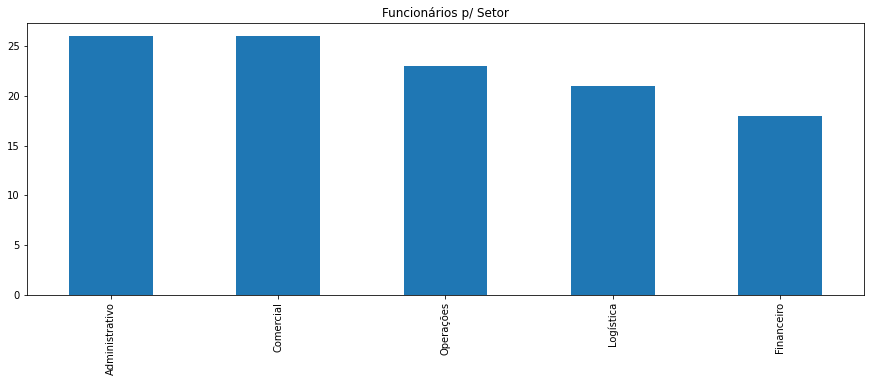

In [5]:
#Somando o total de funcionário por área/setor da empresa e transformando em um dicionário
totalFuncionariosArea = funcionariosDataframe['Area'].value_counts()

#Criando um dicionário de totalFuncionariosArea para melhor impressão dos dados
dictTotalFuncionariosArea = dict(totalFuncionariosArea)

#Imprimindo o o total de funcionários o dicionário de funcionários
display(totalFuncionariosArea)
display(dictTotalFuncionariosArea)

#Iterando sobre o dicionário para melhor impressão e visualização dos dados
for funcionarios in dictTotalFuncionariosArea.items():
    #Unpacking do dicionário.
    departamento, funcionario = funcionarios
    print('Setor {} tem {} funcionários operando.'.format(departamento, funcionario))
    
#Plotando um gráfico para melhor visualização
totalFuncionariosArea.plot(figsize=(15, 5), kind='bar', title='Funcionários p/ Setor')

## Ticket Médio Mensal

In [6]:
#Utilizando método mean para calcular a média dos valores mensais dos contratos.
ticketMedio = clientesDataframe['Valor Contrato Mensal'].mean()

#Imprimindo e formatando em R$
print('Valor do ticket médio da Empresa é de {:_.2f}R$'.format(ticketMedio).replace('.',',').replace('_','.'))

Valor do ticket médio da Empresa é de 2.502,56R$
